# An Infinite Row of Vortices

The objective of this notebook is to visualize the streamlines around a row of infinite vortices. Firstly, the case of a finite row of vortices will be considered, obatined by simple superposition. By adding more and more vortices to the row, a pattern will emerge.

It is possible to derive a closed-form expression for the velocity vector components of an infinite row of vortices, however, it's hard, though, possible. So, after visualizing a finite row of vortices we can visualize an infinite row of vortices and compare the results.

## Vortex Flow (From Previous Modules)

The vortex has a very important role in classical aerodynamic theory. As seen from previous modules, the stream function of a vortex in polar coordinates is given by

$$\psi(r,\theta) = \frac{\Gamma}{2\pi}\ln r$$

and the potential function of the velocity can be found as

$$\phi(r,\theta) = -\frac{\Gamma}{2\pi}\theta$$

Additionally, the components of the velocity vector field have been determined to be 

$$\textbf{v}(r,\theta) = \left(u(r,\theta),v(r,\theta)\right) = \left(0,~-\frac{\Gamma}{2\pi r}\right)$$

for a radial component $u(r,\theta)$ and tangential components $v(r,\theta)$. In Cartesian coordinates, these components may be transformed to afford equivalent representations for the velocity vector field and stream function:

$$\textbf{v}(x,y) = \frac{\Gamma}{2\pi}\left(\frac{y-y_\text{vortex}}{(x-x_\text{vortex})^2+(y-y_\text{vortex})^2},~-\frac{x-x_\text{vortex}}{(x-x_\text{vortex})^2+(y-y_\text{vortex})^2}\right)$$

$$\psi(x,y) = \frac{\Gamma}{2\pi}\ln\left(\big(x-x_\text{vortex}\big)^2+\big(y-y_\text{vortex}\big)^2\right)$$

## Superposition of Many Vortices

Here we'll consider the useful example of the concept of a vortex *sheet*, a model for an infinite row of vortices all of the same strength $\Gamma$ and evenly spaced apart by a distance $a$. The stream function of the $k$th vortex at a distance $r_k$ from the orgiin is given by

$$\psi_k(r,\theta) = \frac{\Gamma}{2\pi}\ln r_k$$

Applying the principle of superposition for a row of $N$ vortices affords an expression for the stream function of the row:

$$\psi = \frac{\Gamma}{2\pi}\sum_{k=1}^N\ln r_k$$

In Cartesian coordinates this transforms exactly as we'd expect for $x$ and $y$ components of the velocity $u(x,y)$ and $v(x,y)$:


$$u(x,y) = \frac{\Gamma}{2\pi}\sum_{k=1}^N\frac{y-y_k}{(x-x_k)^2+(y-y_k)^2}$$

$$v(x,y) = -\frac{\Gamma}{2\pi}\sum_{k=1}^N\frac{x-x_k}{(x-x_k)^2+(y-y_k)^2}$$

Above, $(x_k,y_k)$ is the position of the $k$th vortex of the row. 

We can start visualizing this velocity vector field by building $N$ vortices and computing the superposition of their velocity vectors.

In [1]:
struct singularity_point
    kind::String
    strength::Float32
    x_pos::Number
    y_pos::Number
end;

In [8]:
# Number of points in each direction
N = 100 

# x and y boundaries
xb = (-0.5, 0.5)
yb = (-0.5, 0.5)

# Grid of points
X = range(xb[1], xb[2], N)    
Y = range(yb[1], yb[2], N);    

# strength of the vortex
gamma = 2.0  

Here we define a function which takes an array of $N$ singularities and computes the superposition of their velocity vector components.

In [9]:
using CairoMakie

function finite_vortex_field(
    sources::Any,
    x::Point2{Float64}
    )
    """
    sources = array of vortices, each of type ::singularity_point
    x = x & y positions in velocity vector grid
    """
    # Separating components
    x, y = x[1], x[2]
    
    # Velocity vector components
    u, v, psi = 0, 0, 0
    
    # Velocity components
    for source in sources
        u += (source.strength/2/pi) * (y - source.y_pos)/((x - source.x_pos)^2 + (y - source.y_pos)^2)
        v += -(source.strength/2/pi) * (x - source.x_pos)/((x - source.x_pos)^2 + (y - source.y_pos)^2)
        psi += (source.strength/4/pi) * log((x - source.x_pos)^2 + (y - source.y_pos)^2)
    end
                
    return Point2(u, v), psi
    
end;

Below we create a 3x1 grid of plots, each containing a row of finitely many vortices. The number of vortices in each row increases as we go down plots.

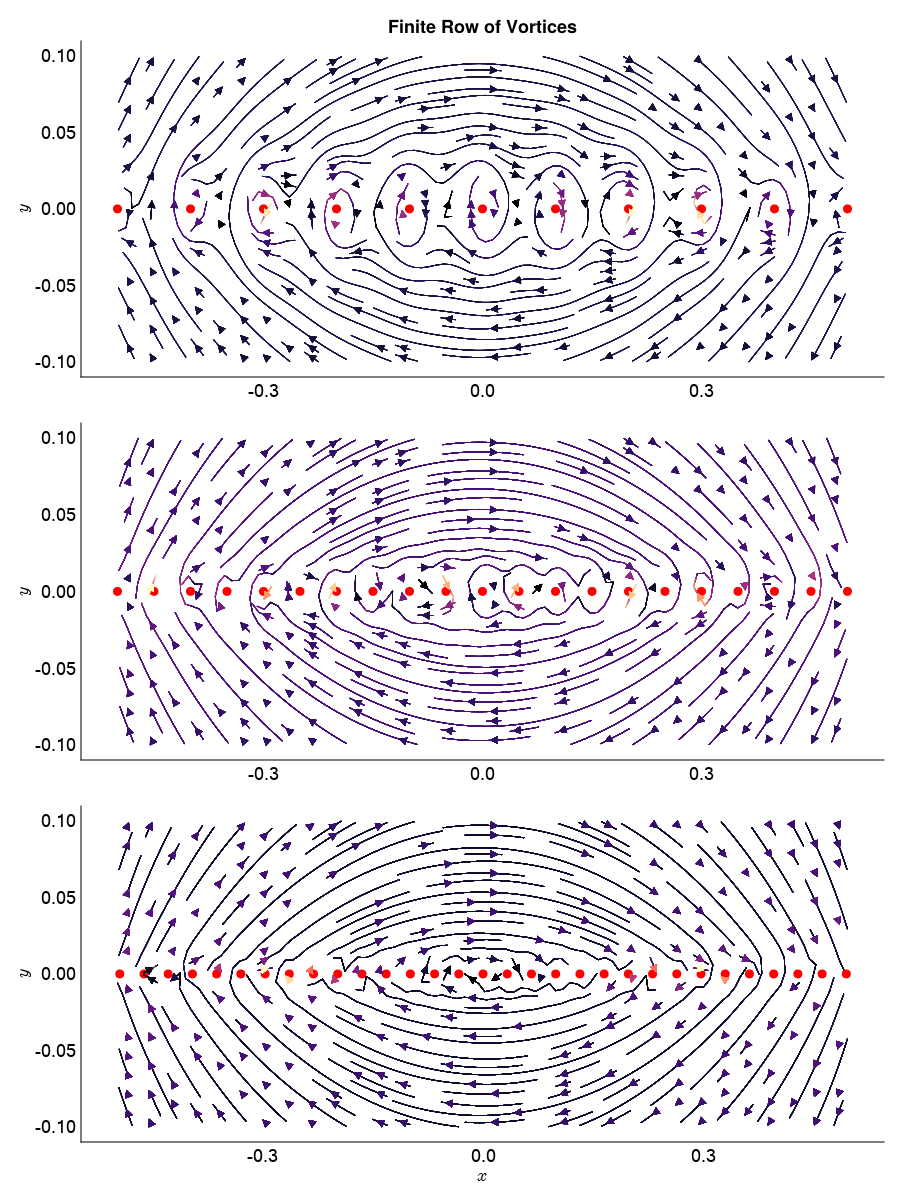

In [44]:
using LaTeXStrings

# Building figure
f = Figure(resolution=(900, 1200))
set_theme!(
    theme_minimal(),
    font = "CM Sans Serif",
    fontsize = 18
)

# Setting axis limits
X = range(-0.5, 0.5, 50)
Y = range(-0.1, 0.1, 50)
xlims!(ax, (minimum(X), maximum(X)))
ylims!(ax, (minimum(Y), maximum(Y)))

##################
### Plotting 1 ###
##################
# Creating axis to plot on
ax = Axis(f[1, 1], ylabel = L"$y$", title = "Finite Row of Vortices")

vortices = []
# Create 10 vortices of equal strength, placed an equal distnance apart along the x-axis
for i in -5:5
    vortex = singularity_point("Vortex $i", gamma, 0.1*i, 0)
    push!(vortices, vortex)
end;

for vortex in vortices
    streamplot!(ax,
        x -> finite_vortex_field(vortices, x)[1], X, Y, 
        color=:black,
        colormap=:magma, 
        arrowsize=15,
        linewidth=0.8
    )
    scatter!((vortex.x_pos, vortex.y_pos), color=:red)
end

##################
### Plotting 2 ###
##################
# Creating axis to plot on
ax = Axis(f[2, 1],  ylabel = L"$y$")

vortices = []
# Create 20 vortices of equal strength, placed an equal distnance apart along the x-axis
for i in -10:10
    vortex = singularity_point("Vortex $i", gamma, 0.05*i, 0)
    push!(vortices, vortex)
end;

for vortex in vortices
    streamplot!(ax,
        x -> finite_vortex_field(vortices, x)[1], X, Y, 
        color=:black,
        colormap=:magma, 
        arrowsize=15,
        linewidth=0.8
    )
    scatter!((vortex.x_pos, vortex.y_pos), color=:red)
end


##################
### Plotting 3 ###
##################
# Creating axis to plot on
ax = Axis(f[3, 1], xlabel = L"$x$", ylabel=L"$y$")

vortices = []
# Create 30 vortices of equal strength, placed an equal distnance apart along the x-axis
for i in -15:15
    vortex = singularity_point("Vortex $i", gamma, 0.033*i, 0)
    push!(vortices, vortex)
end;

for vortex in vortices
    streamplot!(ax,
        x -> finite_vortex_field(vortices, x)[1], X, Y, 
        color=:black,
        colormap=:magma, 
        arrowsize=15,
        linewidth=0.8
    )
    scatter!((vortex.x_pos, vortex.y_pos), color=:red)
end


# Displaying figure
current_figure()

As we can see from the grid above, as the number of vortices *increases* and as the spacing between each vortex *decreases*, the streamlines become more straight and extend across the entire row. Interestingly, at the ends of the rows it appears that the streamlines becomes increasingly vertical and lose any tangential component of the velocity...

## Infinite Row of Vortices

Math isn't always fun.

To derive an analytical expression for the vortex sheet, that is, the velocity vector components for an infinite row of vortices, we must rely on complex numbers. Recall that a complex number $z$ takes the general form

$$z = x+yi$$

for a real component $x$ and imaginary component $y$. The complex potential field of the velocity is defined in this way as $w=\phi+\psi i$ for a potential function $\phi(x,y)$ and stream function $\psi(x,y)$. Differentiating the complex potential function $w$ with respect to the complex variable $z$ affords the complex velocity:

$$\frac{dw}{dz} = u - vi$$

Above, $dw/dz$ represents the complex velocity, $u(x,y)$ is the $x$ component of the real velocity, and $v(x,y)$ is the $y$ component of real velocity such that $\textbf{v}(x,y)=(u,v)$.

We also define the complex potential of a vortex of strength $\Gamma$ as 

$$w = \frac{i\Gamma}{2\pi}\ln z$$

for the complex variable $z$. Why? Recall from Euler's formula that any complex number may be expressed as $z=re^{i\theta}$ so that the complex potential $w$ of a vortex becomes

$$w = \frac{i\Gamma}{2\pi}\ln\left(re^{i\theta}\right) = \frac{i\Gamma}{2\pi}\left(\ln\left(r\right) + \ln\left(e^{i\theta}\right)\right) = \frac{i\Gamma}{2\pi}\ln r + i\theta\frac{i\Gamma}{2\pi} =  - \frac{\Gamma}{2\pi}\theta + \frac{i\Gamma}{2\pi}\ln r = \phi + \psi i $$

where the definitions for $\phi$ and $\psi$ are taken from previous modules.

Now consider the complex potential of a second vortex, located a distance $a$ along the $x$-axis away from the first. Then, we define the complex potential of the second vortex as

$$w_2 = \frac{i\Gamma}{2\pi}\ln(z-a)$$

An additional vortex located a distance $a$ along the $x$-axis away from this one will have the complex potential 

$$w_3 = \frac{i\Gamma}{2\pi}\ln(z-2a)$$

defined relative to the origin. Most generally, the complex potential representing a row of infinite vortices at a separation of $a$, all positioned along the $x$-axis will be given by

$$ w = \frac{i\Gamma}{2\pi} \sum_{k=-\infty}^{\infty}\ln(z-ka) $$

We can rewrite the summation in the following way:

$$ w = \frac{i\Gamma}{2\pi} \sum_{k=-\infty,\\~~~k\neq0}^{\infty}\ln(z-ka) + \frac{i\Gamma}{2\pi}\ln z = \frac{i\Gamma}{2\pi} \sum_{k=-\infty,\\~~~k\neq0}^{\infty}\ln(z-ka) +\frac{i\Gamma}{2\pi}\sum_{k=-\infty,\\~~~k\neq0}^{\infty}\left[\ln\left(\frac{1}{-ka}\right) + \ln(-ka) \right]+ \frac{i\Gamma}{2\pi}\ln z $$

$$ = \frac{i\Gamma}{2\pi} \sum_{k=-\infty,\\~~~k\neq0}^{\infty}\ln\left(\frac{z-ka}{-ka}\right) + \frac{i\Gamma}{2\pi} \sum_{k=-\infty,\\~~~k\neq0}^{\infty}\ln\left(-ka\right) +\frac{i\Gamma}{2\pi}\ln z \phantom{AAAAAAAAAAAAAAAAAAAAAAAAA}$$
$$ = \frac{i\Gamma}{2\pi} \sum_{k=-\infty,\\~~~k\neq0}^{\infty}\ln\left(\frac{z-ka}{-ka}\right) + \frac{i\Gamma}{2\pi}\ln z + \text{constant} \phantom{AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA}$$

Above we simply added a constant to the complex potential (remember the rules for addition and subtraction of logarithms!) Since this expression is a *potential function*, the actual velocity vector field is given by differentiation and that constant will disappear in the end. That is to say, addition of this constant won't affect our final answer!

The reason for this constant appears arbitrary, however, it will allow us a little bit of finesse in the following bout of algebraic gymnastics. For reasons mentioned above I'll also drop the constant term in the following expression because it doesn't really matter and will save space.

$$ w = \frac{i\Gamma}{2\pi} \sum_{k=-\infty,\\~~~k\neq0}^{\infty}\ln\left(\frac{z-ka}{-ka}\right) + \frac{i\Gamma}{2\pi}\ln z = \frac{i\Gamma}{2\pi} \sum_{k=-\infty,\\~~~k\neq0}^{\infty}\ln\left(1-\frac{z}{ka}\right) + \frac{i\Gamma}{2\pi}\ln z $$

$$ = \frac{i\Gamma}{2\pi} \sum_{k=-\infty}^{-1}\ln\left(1-\frac{z}{ka}\right) + \frac{i\Gamma}{2\pi} \sum_{k=1}^{\infty}\ln\left(1-\frac{z}{ka}\right) + \frac{i\Gamma}{2\pi}\ln z \phantom{AAAAAA}$$
$$ = \frac{i\Gamma}{2\pi} \sum_{k=1}^{\infty}\ln\left(1+\frac{z}{ka}\right) + \frac{i\Gamma}{2\pi} \sum_{k=1}^{\infty}\ln\left(1-\frac{z}{ka}\right) + \frac{i\Gamma}{2\pi}\ln z \phantom{AAAAAAA}$$

$$ = \frac{i\Gamma}{2\pi} \sum_{k=1}^{\infty}\left\{\ln\left(1-\frac{z}{ka}\right) + \ln\left(1+\frac{z}{ka}\right)\right\} + \frac{i\Gamma}{2\pi}\ln z \phantom{AAAAAAAAA}$$
$$ = \frac{i\Gamma}{2\pi} \sum_{k=1}^{\infty}\ln\left[\left(1-\frac{z}{ka}\right)\left(1+\frac{z}{ka}\right)\right] + \frac{i\Gamma}{2\pi}\ln z \phantom{AAAAAAAAAAAA}$$
$$ = \frac{i\Gamma}{2\pi} \sum_{k=1}^{\infty}\ln\left(1-\frac{z^2}{k^2a^2}\right) + \frac{i\Gamma}{2\pi}\ln z \phantom{AAAAAAAAAAAAAAAAAA}$$
$$ = \frac{i\Gamma}{2\pi} \sum_{k=1}^{\infty}\ln\left[z\left(1-\frac{z^2}{k^2a^2}\right)\right] \phantom{AAAAAAAAAAAAAAAAAAAAA}$$

$$ = \frac{i\Gamma}{2\pi} \ln\left[z\prod_{k=1}^{\infty}\left(1-\frac{z^2}{k^2a^2}\right)\right] = \frac{i\Gamma}{2\pi} \ln\left[z\prod_{k=1}^{\infty}\left(1-\frac{(\frac{z\pi}{a})^2}{k^2\pi^2}\right)\right] \phantom{AAA}$$

Magically, this product is a formula for the sine function so that the complex potential may be rewritten as

$$w = \frac{i\Gamma}{2\pi}\ln\left[\sin\left(\frac{z\pi}{a}\right)\right] $$

Differentiating the complex potential with respect to the complex variable affords the complex velocity:

$$\frac{dw}{dz} =u-iv= \frac{i\Gamma}{2a}\cot\left(\frac{z\pi}{a}\right) = \frac{i\Gamma}{2a}\frac{\cos\left(\frac{z\pi}{a}\right)}{\sin\left(\frac{z\pi}{a}\right)} = \frac{i\Gamma}{2a}\frac{\cos\left(\frac{x\pi}{a} + \frac{y\pi}{a}i\right)}{\sin\left(\frac{x\pi}{a} + \frac{y\pi}{a}i\right)} $$

Applying some complex trig identities allows us to rewrite this expression as

$$u-iv = \frac{i\Gamma}{2a}\frac{\cos\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right)-i\sin\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)}{\sin\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right)+i\cos\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)} $$

which may be paraphrased as 

$$u-iv = \frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)} + \frac{i\Gamma}{2a}\frac{\sin\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)} $$

Finally, the components of the velocity vector field in Cartesian coordinates are expressed as

$$\textbf{v}(x,y) = (u(x,y), v(x,y)) = \frac{\Gamma}{2a}\left(\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)},~-\frac{\sin\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}\right) $$

On to coding!

In [15]:
# Number of points in each direction
N = 100 

# x and y boundaries
xb = (-1.0, 1.0)
yb = (-0.5, 0.5)

# Grid of points
X = range(xb[1], xb[2], N)    
Y = range(yb[1], yb[2], N);    

# Vortex
gamma = 1.0  
infinite_vortex = singularity_point("Vortex", gamma, 0, 0);

In [41]:
function infinite_vortex_field(
    source::singularity_point,
    sep::Float64,
    x::Point2{Float64}
    )
    """
    source = singularity_point
    x = x & y positions in velocity vector grid
    sep = distance between vortices
    """
    # Separating components
    x, y = x[1], x[2]
    
    # Params
    denom = cosh(2*pi*(y-source.y_pos)/sep) - cos(2*pi*(x-source.x_pos)/sep)
    
    # Velocity components
    u = (source.strength/2/sep) * sinh(2*pi*(y-source.y_pos)/sep) / denom
    v = -(source.strength/2/sep) * sin(2*pi*(x-source.x_pos)/sep) / denom
                 
    return Point2(u, v)
    
end;

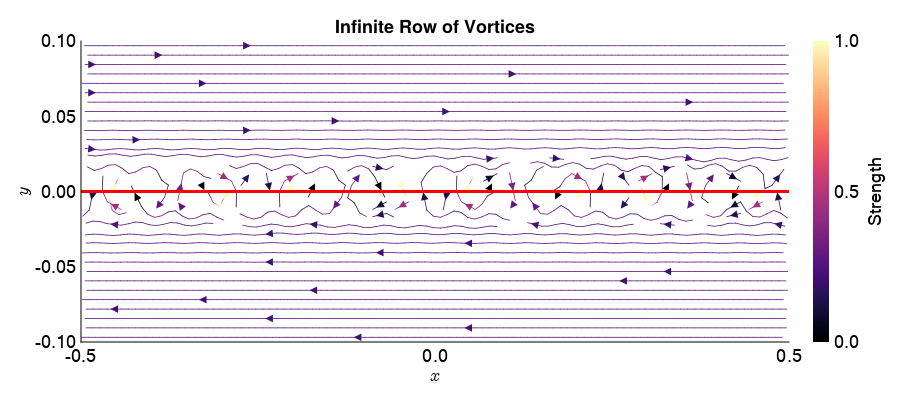

In [43]:
using LaTeXStrings

# Building figure
f = Figure(resolution=(900, 400))

# Creating axis to plot on
ax = Axis(f[1, 1], 
    xlabel = L"$x$", 
    ylabel = L"$y$",
    title = "Infinite Row of Vortices"
)

# Setting axis limits
xlims!(ax, (minimum(X), maximum(X)))
ylims!(ax, (minimum(Y), maximum(Y)))

# Plotting
streamplot!(x -> infinite_vortex_field(infinite_vortex, 0.05, x), X, Y, 
    color=:black,
    colormap=:magma, 
    arrowsize=15,
    linewidth=0.8
)
lines!(ax, X, [0 for _ in Y], color=:red, linewidth=3)

# Colorbar
cb = Colorbar(f[1,2], colormap=:magma, limits=(0,1), label="Strength")

# Displaying figure
current_figure()

Just as we suspected... The velocity vector field surrounding an infinite row of vortices affords lines parallel to the row itself. Interestingly, the vector field breaks down at the boundary of the fluid. Is this consistent with potential flow theory?

Recall the primary assumptions made about fluids in potential flow theory:

* Fluid flow is steady
* The velocity of the fluid is smaller than the speed of sound (the fluid is *incompresssible*)
* There is no internal friction within the fluid, i.e., it is an *inviscid* fluid
* The vorticity of the fluid is zero, i.e., it is *irrotational*, i.e., the *vorticity* is zero

In our case, theory breaks down at the boundary of the surface. This is due to the internal "friction" created by adjacent vortices circulating in opposing directions. Hence, we can think of the boundary of this surface as being *viscid*, thereby not following the third bullet point above and not being able to be represented by potential flow theory. 

Although our theory breaks down at the surface of such a material, this model remains valuable. Notice how there are no streamlines normal to the plane in the plot above. So, oftentimes this model is used to represent a solid surface in potential flow.